# AIML231 Assignment 3
> Shemaiah Rangitaawa `300601546`

This assignment focuses on the design and implementation of a multi-layer perceptron neural network and the use of several machine learning techniques.

## Part One | Linear Regression

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset('mpg')
train, test = train_test_split(df, test_size=0.2, random_state=231)
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
219,25.5,4,122.0,96.0,2300,15.5,77,usa,plymouth arrow gs
157,15.0,8,350.0,145.0,4440,14.0,75,usa,chevrolet bel air
242,21.5,4,121.0,110.0,2600,12.8,77,europe,bmw 320i
287,16.5,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis
230,15.5,8,350.0,170.0,4165,11.4,77,usa,chevrolet monte carlo landau


### EDA
> Scatter plots reveal relationships between the variables.

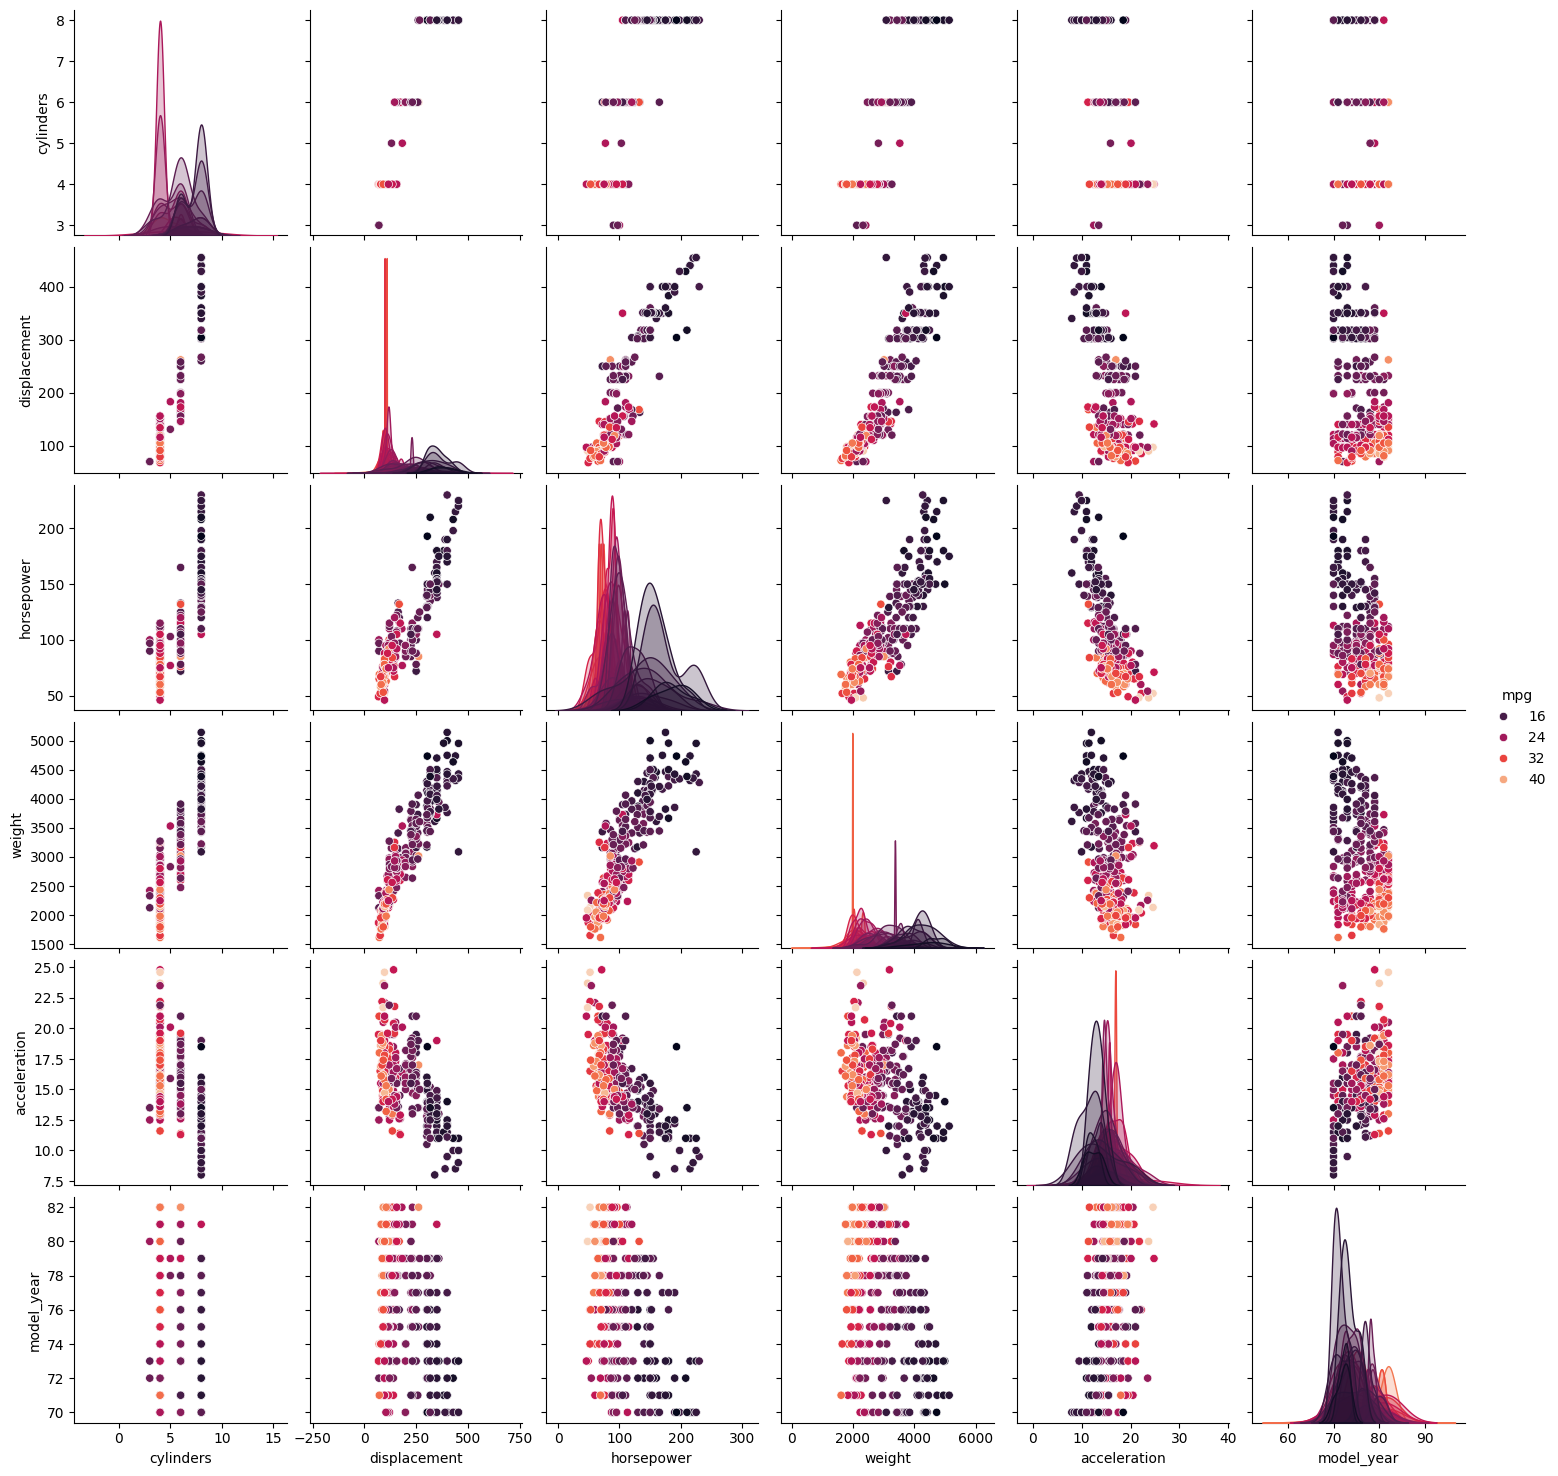

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(train, diag_kind='kde', hue='mpg', palette="rocket")
plt.show()

> The histograms reveal the distribution of each feature.

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

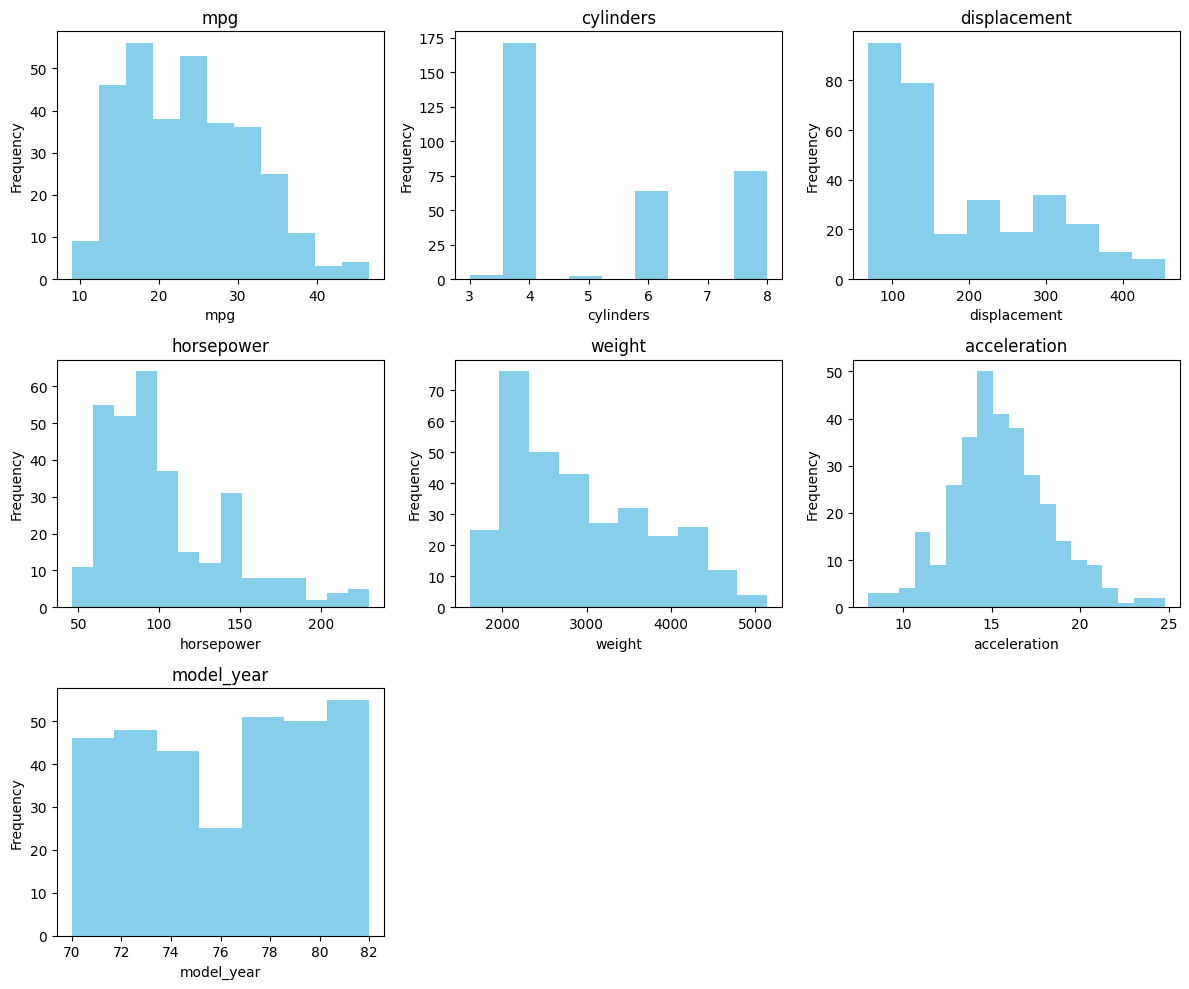

In [4]:
plt.style.use('seaborn-v0_8-muted')
axarr = train.hist(bins='fd', figsize=(12, 10), color='skyblue', grid=False) 
n_cols = len(train.columns)
axes = axarr.flatten()

for i, ax in enumerate(axes):
    ax.set_ylabel('Frequency')
    if i >= len(axes) - n_cols:
        ax.set_xlabel(ax.get_title())

plt.tight_layout()
plt.show()

> There are six missing values in the horsepower feature, I will use median imputation to fill in these values.

### Preprocessing
> Median Imputation was used to fill in the missing values in the dataset.

In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [7]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Apply the imputer to horsepower
train['horsepower'] = imputer.fit_transform(train[['horsepower']])
test['horsepower'] = imputer.fit_transform(test[['horsepower']])

# Check if any missing values remain
train['horsepower'].isnull().sum(), test['horsepower'].isnull().sum()

(0, 0)